<a href="https://colab.research.google.com/github/Chienstartup/ISIC_2024/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Feature Engineering</h1>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Chienstartup/ISIC_2024/main/isic_data/sample_5k.csv')

According to the discussion held by PASTOR SOTO, from https://www.kaggle.com/competitions/isic-2024-challenge/discussion/516588</br>
Synthesized features based on the clinical assessment for melanoma: ABCD

In [5]:
def feature_engineering(df):
  df['red_int_vascular'] = df.tbp_lv_A/df.tbp_lv_Aext #Measures the intensity of the "red" color component within the lesion and in the surrounding skin. Differences might indicate inflammation or vascular changes.
  df['yellow_int_pigement_change'] = df.tbp_lv_B/df.tbp_lv_Bext #Measures the intensity of the "yellow" color component within the lesion and in the surrounding skin. Variations might suggest pigmentation changes
  df['chroma_int_darkness'] = df.tbp_lv_C/df.tbp_lv_Cext #Chroma (colorfulness) inside and outside the lesion. Higher chroma might indicate darker pigmentation.
  df['overall_color'] = df.tbp_lv_H/df.tbp_lv_Hext #Hue (the dominant color) inside and outside the lesion. This can help assess the lesion's overall color.
  df['brightness'] = df.tbp_lv_L/df.tbp_lv_Lext #	Lightness (brightness) inside and outside the lesion. Darker lesions may have a lower L value.
  df['color_variety'] = df.tbp_lv_color_std_mean #How much the color varies within the lesion. High variation can be a sign of an atypical lesion.
  df['avg_contrast'] = (df.tbp_lv_deltaA + df.tbp_lv_deltaB + df.tbp_lv_deltaL +150)/3 #overall contrast
  return df

"Feature Selection through ICC and Standardization: Comparative Analysis of Original, Within-Group, and Between-Group Approaches"</br>
1.   Feature Selection: The primary goal of the code is to select the most relevant features from a set of columns of interest.
2.   ICC (Intraclass Correlation Coefficient): The code calculates ICC for each feature, which is used as one of the criteria for feature selection.
3.   Standardization: The code applies both within-group and between-group standardization to the features, providing different perspectives on the data.
4.   Comparative Analysis: The code compares three different approaches:
*  Original data
*  Within-group standardized data
*  Between-group standardized data
5.   Approaches: The code analyzes how features perform under these three different approaches, looking at ICC and between-group variance.

1. Features recommended by all three methods:
['tbp_lv_Hext', 'tbp_lv_H', 'tbp_lv_deltaLB', 'tbp_lv_L', 'tbp_lv_Cext', 'tbp_lv_B', 'tbp_lv_nevi_confidence', 'tbp_lv_stdLExt', 'tbp_lv_Lext', 'tbp_lv_Bext', 'tbp_lv_deltaL', 'tbp_lv_deltaLBnorm']

2. Features recommended by original data and between-group standardization, but not by within-group standardization:
['tbp_lv_deltaA', 'tbp_lv_C', 'tbp_lv_deltaB']

3. Features recommended by original data and within-group standardization, but not by between-group standardization:
['tbp_lv_Aext']

4. Features recommended by within-group and between-group standardization, but not by original data:
[]

5. Features recommended only by original data:
[]

6. Features recommended only by within-group standardization:
['tbp_lv_area_perim_ratio', 'tbp_lv_minorAxisMM', 'tbp_lv_norm_color']

7. Features recommended only by between-group standardization:
['tbp_lv_areaMM2']

8. Features not recommended by any method:
['tbp_lv_norm_border', 'tbp_lv_eccentric

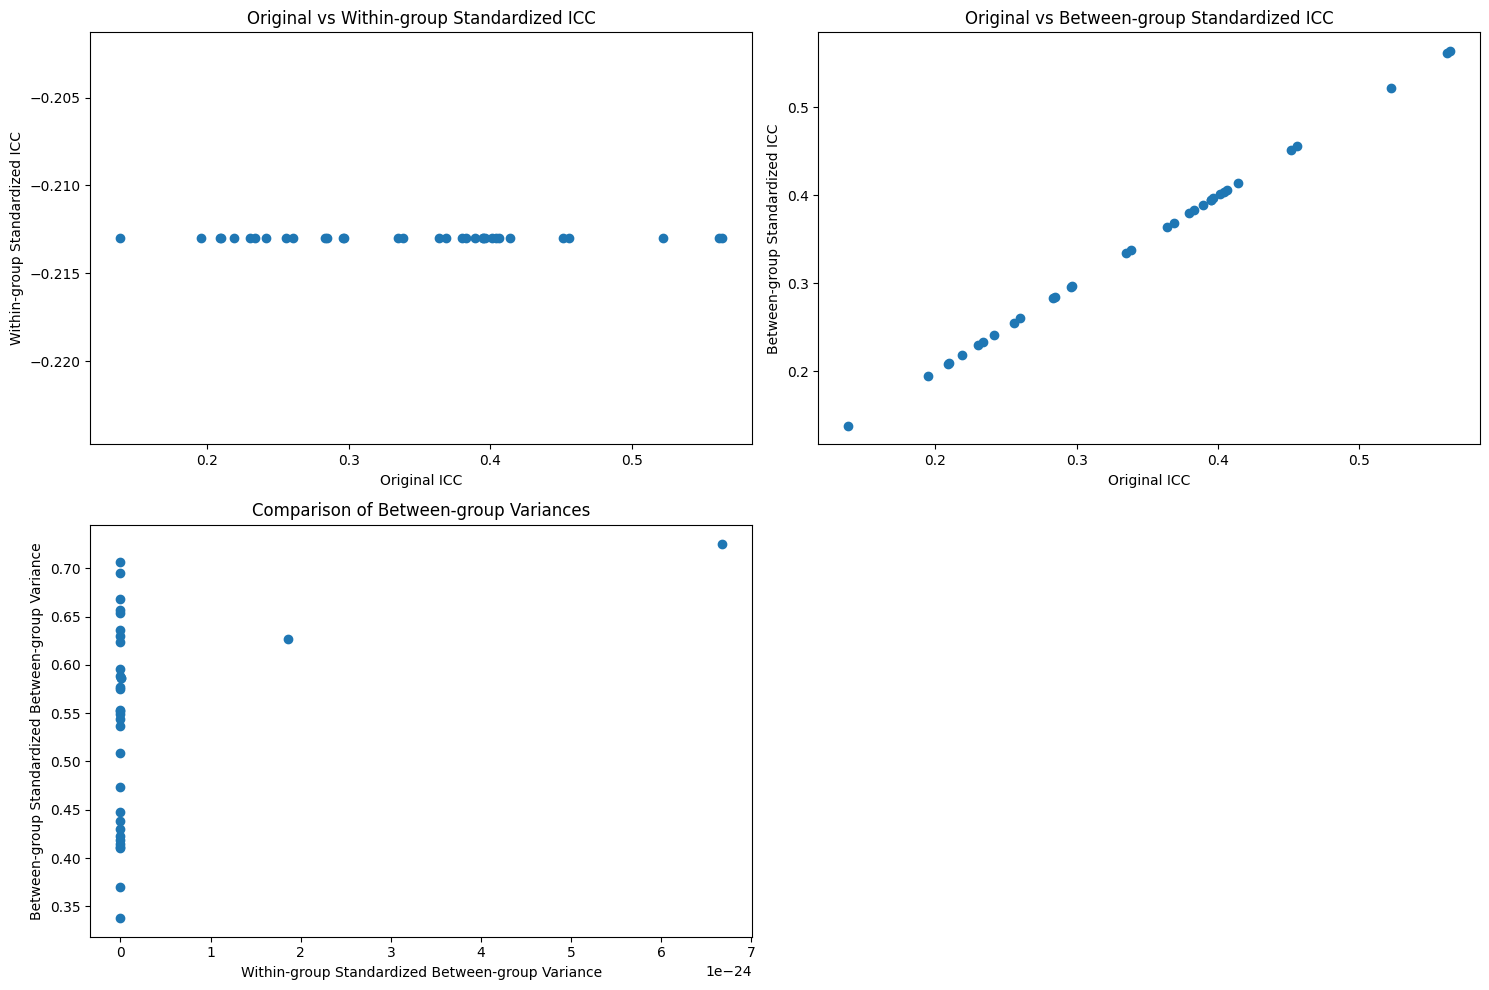

In [4]:
# # ensure dtype of patient_id to be string
# train_df['patient_id'] = train_df['patient_id'].astype(str)

# columns_of_interest = ['clin_size_long_diam_mm',
#     'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
#     'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
#     'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
#     'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
#     'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
#     'tbp_lv_eccentricity',
#     'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
#     'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
#     'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
#     'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
#     'tbp_lv_z']

# def calculate_icc(df, column, group='patient_id'):
#     """Calculate ICC(1, 1) - one-way random effects model"""
#     groups = df[group].unique()
#     n = len(groups)
#     k = df.groupby(group).size().mean()

#     # Calculate between-group sum of squares
#     ssb = ((df.groupby(group)[column].mean() - df[column].mean())**2).sum() * k

#     # Calculate within-group sum of squares
#     group_means = df.groupby(group)[column].transform('mean')
#     ssw = ((df[column] - group_means)**2).sum()

#     # Calculate ICC
#     msb = ssb / (n - 1)
#     msw = ssw / (n * (k - 1))
#     icc = (msb - msw) / (msb + (k - 1) * msw)
#     return icc

# def within_group_standardize(df, column, group='patient_id'):
#     return df.groupby(group)[column].transform(lambda x: (x - x.mean()) / x.std())

# def between_group_standardize(df, column):
#     return (df[column] - df[column].mean()) / df[column].std()

# def calculate_between_group_variance(df, column, group='patient_id'):
#     group_means = df.groupby(group)[column].mean()
#     return np.var(group_means)

# # Original data analysis
# original_icc = {col: calculate_icc(train_df, col) for col in columns_of_interest}

# # Within-group standardization
# train_df_within_std = train_df.copy()
# for col in columns_of_interest:
#     train_df_within_std[f'{col}_within_std'] = within_group_standardize(train_df, col)
# within_std_icc = {col: calculate_icc(train_df_within_std, f'{col}_within_std') for col in columns_of_interest}
# within_std_between_var = {col: calculate_between_group_variance(train_df_within_std, f'{col}_within_std') for col in columns_of_interest}

# # Between-group standardization
# train_df_between_std = train_df.copy()
# for col in columns_of_interest:
#     train_df_between_std[f'{col}_between_std'] = between_group_standardize(train_df, col)
# between_std_icc = {col: calculate_icc(train_df_between_std, f'{col}_between_std') for col in columns_of_interest}
# between_std_between_var = {col: calculate_between_group_variance(train_df_between_std, f'{col}_between_std') for col in columns_of_interest}

# # Organize results
# results = []
# for col in columns_of_interest:
#     results.append({
#         'feature': col,
#         'original_icc': original_icc[col],
#         'within_std_icc': within_std_icc[col],
#         'within_std_between_var': within_std_between_var[col],
#         'between_std_icc': between_std_icc[col],
#         'between_std_between_var': between_std_between_var[col]
#     })

# results_df = pd.DataFrame(results)

# # Feature selection
# median_original_icc = results_df['original_icc'].median()
# median_within_std_var = results_df['within_std_between_var'].median()
# median_between_std_var = results_df['between_std_between_var'].median()

# original_features = set(results_df[results_df['original_icc'] > median_original_icc]['feature'])
# within_std_features = set(results_df[results_df['within_std_between_var'] > median_within_std_var]['feature'])
# between_std_features = set(results_df[results_df['between_std_between_var'] > median_between_std_var]['feature'])

# # Comprehensive classification
# all_features = set(columns_of_interest)

# recommended_all = original_features & within_std_features & between_std_features
# recommended_original_between = original_features & between_std_features - within_std_features
# recommended_original_within = original_features & within_std_features - between_std_features
# recommended_within_between = within_std_features & between_std_features - original_features
# recommended_original_only = original_features - within_std_features - between_std_features
# recommended_within_only = within_std_features - original_features - between_std_features
# recommended_between_only = between_std_features - original_features - within_std_features
# not_recommended = all_features - original_features - within_std_features - between_std_features

# print("1. Features recommended by all three methods:")
# print(list(recommended_all))

# print("\n2. Features recommended by original data and between-group standardization, but not by within-group standardization:")
# print(list(recommended_original_between))

# print("\n3. Features recommended by original data and within-group standardization, but not by between-group standardization:")
# print(list(recommended_original_within))

# print("\n4. Features recommended by within-group and between-group standardization, but not by original data:")
# print(list(recommended_within_between))

# print("\n5. Features recommended only by original data:")
# print(list(recommended_original_only))

# print("\n6. Features recommended only by within-group standardization:")
# print(list(recommended_within_only))

# print("\n7. Features recommended only by between-group standardization:")
# print(list(recommended_between_only))

# print("\n8. Features not recommended by any method:")
# print(list(not_recommended))

# # Visualization
# plt.figure(figsize=(15, 10))

# plt.subplot(221)
# plt.scatter(results_df['original_icc'], results_df['within_std_icc'])
# plt.xlabel('Original ICC')
# plt.ylabel('Within-group Standardized ICC')
# plt.title('Original vs Within-group Standardized ICC')

# plt.subplot(222)
# plt.scatter(results_df['original_icc'], results_df['between_std_icc'])
# plt.xlabel('Original ICC')
# plt.ylabel('Between-group Standardized ICC')
# plt.title('Original vs Between-group Standardized ICC')

# plt.subplot(223)
# plt.scatter(results_df['within_std_between_var'], results_df['between_std_between_var'])
# plt.xlabel('Within-group Standardized Between-group Variance')
# plt.ylabel('Between-group Standardized Between-group Variance')
# plt.title('Comparison of Between-group Variances')

# plt.tight_layout()
# plt.show()

In [6]:
def process_features(df, train = True):
    # Define various feature categories
    recommended_all = ['tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_H', 'tbp_lv_deltaLB', 'tbp_lv_Cext', 'tbp_lv_Bext',
                       'tbp_lv_A', 'tbp_lv_Lext', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_deltaLBnorm', 'tbp_lv_C']
    recommended_original_between = ['tbp_lv_deltaL', 'tbp_lv_nevi_confidence', 'tbp_lv_deltaA', 'tbp_lv_deltaB']
    recommended_within_only = ['tbp_lv_y', 'tbp_lv_stdLExt', 'tbp_lv_eccentricity', 'tbp_lv_area_perim_ratio']

    # Copy DataFrame to avoid modifying original data
    df_processed = df.copy()

    # Define within-group and between-group standardization functions
    def within_group_standardize(x):
        return (x - x.mean()) / x.std()

    def between_group_standardize(x):
        return (x - x.mean()) / x.std()

    # 1. Process features recommended by all three methods
    for feature in recommended_all:
        df_processed[f'{feature}_within_std'] = df_processed.groupby('patient_id')[feature].transform(within_group_standardize)
        df_processed[f'{feature}_between_std'] = between_group_standardize(df_processed[feature])

    # 2. Process features recommended by original data and between-group standardization
    for feature in recommended_original_between:
        df_processed[f'{feature}_between_std'] = between_group_standardize(df_processed[feature])

    # 3 & 4 & 5 & 7. These categories are empty, no processing needed

    # 6. Process features recommended only by within-group standardization
    for feature in recommended_within_only:
        df_processed[f'{feature}_within_std'] = df_processed.groupby('patient_id')[feature].transform(within_group_standardize)
        df_processed = df_processed.drop(columns=[feature])


    def frequency_encoding(df, cat_cols):
        """
        Perform Frequency Encoding on specified categorical columns in the DataFrame.

        :param df: DataFrame to process
        :param cat_cols: List of categorical column names
        :return: DataFrame after Frequency Encoding
        """
        df_encoded = df.copy()  # Create a copy of DataFrame to avoid modifying original data
        for col in cat_cols:
            # Calculate frequency for each category
            freq_encoding = df_encoded[col].value_counts() / len(df_encoded)
            # Replace original category values with frequency values
            df_encoded[col + '_encoded'] = df_encoded[col].map(freq_encoding)

        return df_encoded

    def split_cluster_predict(df):
        unique_clusters = df['cluster'].unique()  # Get all unique cluster values
        for cluster in unique_clusters:
            # Create a new column for each cluster
            df[f'cluster_{cluster}_predict'] = df.apply(
                lambda row: row['cluster_predict'] if row['cluster'] == cluster else 0,
                axis=1
            )
        df = df.drop('cluster_predict', axis = 1)
        return df

    cat_cols = ['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'attribution']

    if train:
        df_processed = df_processed.drop(['copyright_license', 'lesion_id','image_type','tbp_tile_type',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'], axis = 1)
        df_processed.age_approx = df_processed.age_approx.fillna(df_processed.age_approx.median())
        df_processed.sex = df.sex.fillna('male')
        df_processed.anatom_site_general  = df_processed.anatom_site_general.fillna('unknown')
        df_processed = frequency_encoding(df_processed, cat_cols)
        df_processed = df_processed.drop(cat_cols, axis = 1)

    else:
        df_processed= df_processed.drop(['copyright_license', 'image_type', 'tbp_tile_type'], axis = 1)
        df_processed.age_approx = df_processed.age_approx.fillna(df.age_approx.median())
        df_processed.sex = df_processed.sex.fillna('male')
        df_processed.anatom_site_general  = df_processed.anatom_site_general.fillna('unknown')
        df_processed = frequency_encoding(df_processed, cat_cols)
        df_processed = df_processed.drop(cat_cols, axis = 1)

    return df_processed

Features used by Kaggle Master Rich Olson,derived from https://www.kaggle.com/code/richolson/isic-2024-lgbm-imagenet-v5a

In [12]:
def process_data(df):
    df['lesion_size_ratio'] = df['tbp_lv_minorAxisMM'] / df['clin_size_long_diam_mm']
    df['lesion_shape_index'] = df['tbp_lv_areaMM2'] / (df['tbp_lv_perimeterMM'] ** 2)
    df['hue_contrast'] = (df['tbp_lv_H'] - df['tbp_lv_Hext']).abs()
    df['luminance_contrast'] = (df['tbp_lv_L'] - df['tbp_lv_Lext']).abs()
    df['lesion_color_difference'] = np.sqrt(df['tbp_lv_deltaA'] ** 2 + df['tbp_lv_deltaB'] ** 2 + df['tbp_lv_deltaL'] ** 2)
    df['border_complexity'] = df['tbp_lv_norm_border'] + df['tbp_lv_symm_2axis']
    df['color_uniformity'] = df['tbp_lv_color_std_mean'] / (df['tbp_lv_radial_color_std_max'] + 1e-6)

    df['position_distance_3d'] = np.sqrt(df['tbp_lv_x'] ** 2 + df['tbp_lv_y_within_std'] ** 2 + df['tbp_lv_z'] ** 2)
    df['perimeter_to_area_ratio'] = df['tbp_lv_perimeterMM'] / df['tbp_lv_areaMM2']
    df['area_to_perimeter_ratio'] = df['tbp_lv_areaMM2'] / df['tbp_lv_perimeterMM']
    df['lesion_visibility_score'] = df['tbp_lv_deltaLBnorm'] + df['tbp_lv_norm_color']
    df['symmetry_border_consistency'] = df['tbp_lv_symm_2axis'] * df['tbp_lv_norm_border']
    df['consistency_symmetry_border'] = df['tbp_lv_symm_2axis'] * df['tbp_lv_norm_border'] / (df['tbp_lv_symm_2axis'] + df['tbp_lv_norm_border'])

    df['color_consistency'] = df['tbp_lv_stdL'] / df['tbp_lv_Lext']
    df['consistency_color'] = df['tbp_lv_stdL'] * df['tbp_lv_Lext'] / (df['tbp_lv_stdL'] + df['tbp_lv_Lext'])
    df['size_age_interaction'] = df['clin_size_long_diam_mm'] * df['age_approx']
    df['lesion_severity_index'] = (df['tbp_lv_norm_border'] + df['tbp_lv_norm_color'] + df['tbp_lv_eccentricity_within_std']) / 3
    df['shape_complexity_index'] = df['border_complexity'] + df['lesion_shape_index']
    df['color_contrast_index'] = df['tbp_lv_deltaA'] + df['tbp_lv_deltaB'] + df['tbp_lv_deltaL'] + df['tbp_lv_deltaLBnorm']
    df['tbp_lv_vector_deltaLAB'] = np.sqrt(df['tbp_lv_deltaA']**2 + df['tbp_lv_deltaB']**2 + df['tbp_lv_deltaL']**2)

    df['log_lesion_area'] = np.log(df['tbp_lv_areaMM2'] + 1)
    df['normalized_lesion_size'] = df['clin_size_long_diam_mm'] / df['age_approx']
    df['mean_hue_difference'] = (df['tbp_lv_H'] + df['tbp_lv_Hext']) / 2
    df['std_dev_contrast'] = np.sqrt((df['tbp_lv_deltaA'] ** 2 + df['tbp_lv_deltaB'] ** 2 + df['tbp_lv_deltaL'] ** 2) / 3)
    df['color_shape_composite_index'] = (df['tbp_lv_color_std_mean'] + df['tbp_lv_area_perim_ratio_within_std'] + df['tbp_lv_symm_2axis']) / 3
    df['lesion_orientation_3d'] = np.arctan2(df['tbp_lv_y_within_std'], df['tbp_lv_x'])
    df['overall_color_difference'] = (df['tbp_lv_deltaA'] + df['tbp_lv_deltaB'] + df['tbp_lv_deltaL']) / 3
    df['hue_color_std_interaction']       = df['tbp_lv_H'] *df['tbp_lv_color_std_mean']
    df['symmetry_perimeter_interaction'] = df['tbp_lv_symm_2axis'] * df['tbp_lv_perimeterMM']
    df['comprehensive_lesion_index'] = (df['tbp_lv_area_perim_ratio_within_std'] + df['tbp_lv_eccentricity_within_std'] + df['tbp_lv_norm_color'] + df['tbp_lv_symm_2axis']) / 4
    df['color_variance_ratio'] = df['tbp_lv_color_std_mean'] / df['tbp_lv_stdLExt_within_std']
    df['border_color_interaction'] = df['tbp_lv_norm_border'] * df['tbp_lv_norm_color']
    df['border_color_interaction_2'] = df['tbp_lv_norm_border'] * df['tbp_lv_norm_color'] / (df['tbp_lv_norm_border'] + df['tbp_lv_norm_color'])
    df['size_color_contrast_ratio'] = df['clin_size_long_diam_mm'] / df['tbp_lv_deltaLBnorm']
    df['age_normalized_nevi_confidence'] = df['tbp_lv_nevi_confidence'] / df['age_approx']
    df['age_normalized_nevi_confidence_2'] = np.sqrt(df['clin_size_long_diam_mm']**2 + df['age_approx']**2)
    df['color_asymmetry_index'] = df['tbp_lv_radial_color_std_max'] * df['tbp_lv_symm_2axis']

    df['volume_approximation_3d'] = df['tbp_lv_areaMM2'] * np.sqrt(df['tbp_lv_x']**2 + df['tbp_lv_y_within_std']**2 + df['tbp_lv_z']**2)
    df['color_range'] = (df['tbp_lv_L'] - df['tbp_lv_Lext']).abs() + (df['tbp_lv_A'] - df['tbp_lv_Aext']).abs() + (df['tbp_lv_B'] - df['tbp_lv_Bext']).abs()
    df['shape_color_consistency'] = df['tbp_lv_eccentricity_within_std'] * df['tbp_lv_color_std_mean']
    df['border_length_ratio'] = df['tbp_lv_perimeterMM'] / (2 * np.pi * np.sqrt(df['tbp_lv_areaMM2'] / np.pi))
    df['age_size_symmetry_index'] = df['age_approx'] * df['clin_size_long_diam_mm'] * df['tbp_lv_symm_2axis']
    df['index_age_size_symmetry'] = df['age_approx'] * df['tbp_lv_areaMM2'] * df['tbp_lv_symm_2axis']
    df['tbp_lv_count'] = df.groupby('patient_id')['isic_id'].transform('count')
    def safe_zscore(x):
        mean = x.mean()
        std = x.std()
        if std == 0:
            return np.zeros(len(x))
        return (x - mean) / std
    for col in ['size_age_interaction', 'age_approx', 'tbp_lv_norm_color','tbp_lv_H', 'tbp_lv_stdLExt_within_std', 'tbp_lv_vector_deltaLAB']:
        df[f'{col}_zscore'] = df.groupby('patient_id')[col].transform(lambda x: safe_zscore(x) if len(x) > 1 else x - x.mean())
    return df

<h1>Combined Feature Engineering</h1>

In [13]:
def combine_features(df):
  df = feature_engineering(df)
  df = process_features(df)
  df = process_data(df)
  return df

In [14]:
df_train = combine_features(train_df)

In [16]:
df_train.to_csv('df_train.csv', index = False)